In [40]:
import random
from sklearn.feature_extraction.text import CountVectorizer

with open('Dataset.csv','r',encoding='utf-8') as file:
    data=file.read()

data_mod=data.split('\n')[1:]
data_mod = [_.split(',')[:2] for _ in data_mod]
data=[]

for i in data_mod:
    if len(i)==2:
        if i[0]=='ham':
            i[0]=0.0
        else:
            i[0]=1.0    
        data.append(i)

data_mod=data
random.shuffle(data_mod)
test=data_mod[0:20]
train=data_mod
test_x = [_[1] for _ in test]
test_y = [_[0] for _ in test]
train_x = [_[1] for _ in train]
train_y = [_[0] for _ in train]
tf_vectorizer = CountVectorizer()
train_x_tf = tf_vectorizer.fit_transform(train_x)
test_x_tf = tf_vectorizer.transform(test_x)

Util Functions

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plot
def evaluate(predicted, actual):
    print(metrics.confusion_matrix(actual, predicted))
    print(metrics.classification_report(actual, predicted))

Logistical Regression

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



SVM

In [43]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[ 7  0]
 [ 2 11]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88         7
         1.0       1.00      0.85      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



XGboost

In [46]:
from xgboost import XGBRegressor
import numpy as np
clf = XGBRegressor()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
opt = np.round(np.abs(opt))
evaluate(opt, test_y)

[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Graph

f1-score


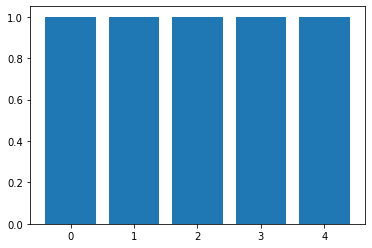

Precission


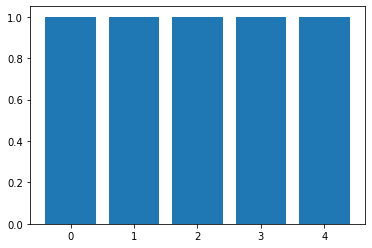

Recall


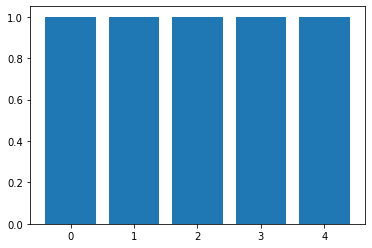

In [47]:
import matplotlib.pyplot as plot
print('f1-score')
plot.bar([0,1,2,3,4],[1.00,1.00,1.00,1.00,1.00])
plot.show()
print('Precission')
plot.clf()
plot.bar([0,1,2,3,4],[1.00,1.00,1.00,1.00,1.00])
plot.show()
print('Recall')
plot.clf()
plot.bar([0,1,2,3,4],[1.00,1.00,1.00,1.00,1.00])
plot.show()